<a href="https://colab.research.google.com/github/balamurugan-palaniappan-CEP/AIML_CEP_2021/blob/main/Ensemble%20Methods/EnsembleMethods_7Nov2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\Large{\text{Ensemble methods}}$ 

Let us first generate a synthetic data set.

We shall generate $n$ ($n$ being even) samples where the feature vector of each sample is 2-dimensional of the form $x^i = (x^i_1,x^i_2), i \in \{1,2,\ldots,n\}$. We assume that $\frac{n}{2}$ samples are from a spiral shaped data set called $S_1$ and other $\frac{n}{2}$ samples are from a different spiral called $S_2$. For each sample $x^i$ we have the following labeling scheme:

$
\begin{align}
y^i = \begin{cases}
        +1 \text{ if } x^i \in S_1 \\ 
        -1 \text{ if }  x^i \in S_2.
      \end{cases}
\end{align}
$

Here the spirals $S_1$ and $S_2$ are associated with the parametric forms: 
$x_1 = r(\varphi) \cos \varphi$ and $x_2 = r(\varphi) \sin \varphi$ where$\varphi$ the angle and $r(\varphi)$ is a (monotonically increasing) radius function depending on the angle $\varphi$. The coordinates are $x_1$ and $x_2$.  



(600, 2)
(600,)


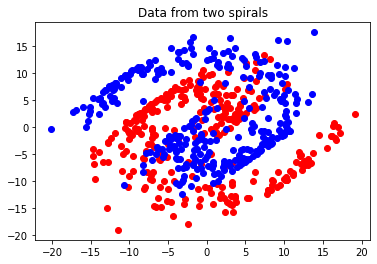

In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

num_samples = 600
angle = np.linspace(0,2*pi,int(num_samples/2))
mean = [0.0, 0.0]
cov = [ [6.0, 6.0], [6.0, 6.0] ] 

X = np.zeros( (num_samples, 2) ) 

r_1 = 2*angle + pi
data_1 = np.array([np.cos(angle)*r_1, np.sin(angle)*r_1]).T
#print(data_1.shape)
X_1 = data_1 + np.random.multivariate_normal(mean, cov, int(num_samples/2)) #np.random.randn(int(num_samples/2),2)
X[:int(num_samples/2),:] = X_1

r_2 = -2*angle - pi
data_2 = np.array([np.cos(angle)*r_2, np.sin(angle)*r_2]).T
X_2 = data_2 + np.random.multivariate_normal(mean, cov, int(num_samples/2)) #np.random.randn(int(num_samples/2),2)
X[int(num_samples/2):,:] = X_2

y = np.ones(num_samples)
y[int(num_samples/2):] = -1*y[int(num_samples/2)]
#print(y)


print(X.shape)
print(y.shape)

figure, axes = plt.subplots(1) 
 

plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='o', color='blue')


plt.title( 'Data from two spirals' ) 
plt.show() 


Consider an input space $\mathcal{X} \subseteq {\mathbb{R}}^d$ and the output space $\mathcal{Y} = \{+1,-1\}$. Assume a fixed (but unknown) distribution $P(X,Y)$ over $\mathcal{X} \times \mathcal{Y}$. 

Let us assume that there are 15 base classifiers $C_1, C_2, \ldots, C_{15},$ where each classifier has an error rate of $\epsilon = 0.25$ on some sample from a fixed data distribution $P(X,Y)$. 

To predict the label for a test sample $\hat{x}$, we adopt the following inference procedure (called $\textbf{Ensemble Classifier}(\textbf{EC})$):

1.   Predict $C_i(\hat{x})$ using each classifier $C_i, \ i \in \{1,2,\ldots,15\}$.
2.   Predict the final label $\hat{y} = \arg\max_{y \in \mathcal{Y}} \sum_{i=1}^{15} \delta(y==C_i(\hat{x}))$ where $\delta(p)$ is the indicator function given by:

  $
  \delta(p) = 
  \begin{cases}
  1 \text{ if } p \text{ is true. } \\ 
  0 \text{ if } p \text{ is false. }  
  \end{cases}
  $



$\textbf{Question:}$ What would be error rate of the classifier obtained from the above inference algorithm $\textbf{EC}$? 

$\textbf{One possible answer:}$

Suppose the classifiers are assumed to be independent, then the $\textbf{EC}$ classifier would make an error only when more than half of the classifiers (i.e. more than 7 classifiers) make error in the prediction. Hence  we may write the error rate of $\textbf{EC}$ as:

$
\begin{align}
\text{error}_{\textbf{EC}} = \sum_{i=8}^{15} \begin{pmatrix} 15 \\  i \end{pmatrix} {\epsilon}^{i} (1-\epsilon)^{15-i} 
\end{align}
$

which is approximately $0.017$. Note that this error rate is considerably smaller than the individual error rates of the classifiers. 

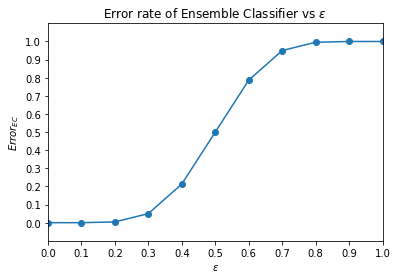

In [2]:
#compute the error rates of EC for different error rates of C_i
import math 

def comb(n, k):
    return math.factorial(n) // math.factorial(k) // math.factorial(n - k)


epsilons = np.linspace(0,1,11)
errors = np.zeros(epsilons.shape)

num_classifiers = 15
eps_idx=0
for epsilon in epsilons:
  error_EC = 0
  for j in np.arange(np.ceil(num_classifiers/2),num_classifiers+1):
    err = comb(num_classifiers,j)*math.pow(epsilon,j)*math.pow(1-epsilon,num_classifiers-j)
    error_EC += err
  errors[eps_idx] = error_EC
  eps_idx+=1 


figure, ax = plt.subplots(1) 

plt.plot(epsilons, errors, marker='o')
ax.set_xlabel('$\epsilon$')
ax.set_ylabel('$Error_{EC}$')
ax.set_xlim(0, 1)
ax.set_ylim(errors.min()-0.1,errors.max()+0.1)
ax.set_xticks(epsilons)
ax.set_yticks(np.linspace(0,1,11))
ax.set_title('Error rate of Ensemble Classifier vs $\epsilon$')
plt.show()


$\textbf{Important to note:}$ 



1.   The base classifiers $C_1, C_2, \ldots, C_{15}$ are assumed to be independent. 
2.   The error rate $\epsilon$ of each base classifier must be less than $0.5$ for the ensemble classifier to behave better. $\textbf{What is meant by a base classifier having an error rate less than } 0.5$?



$\large{\text{Ways of building an ensemble classifier}}$

$\textbf{Create multiple data partitions from training data}$

1.   Resample the original training data $D$ (using sampling with replacement) and create different data paritions $D_1, D_2, \ldots, D_M$. 
2.   Train different classifiers $C_i$ on respective data partition $D_i$, $i \in \{1,2,\ldots,M\}$.
3.   For a test data point $\hat{x}$ predict the label $\hat{y}=\text{MajorityVote}(C_1(\hat{x}),C_2(\hat{x}), \ldots, C_M(\hat{x}))$.  







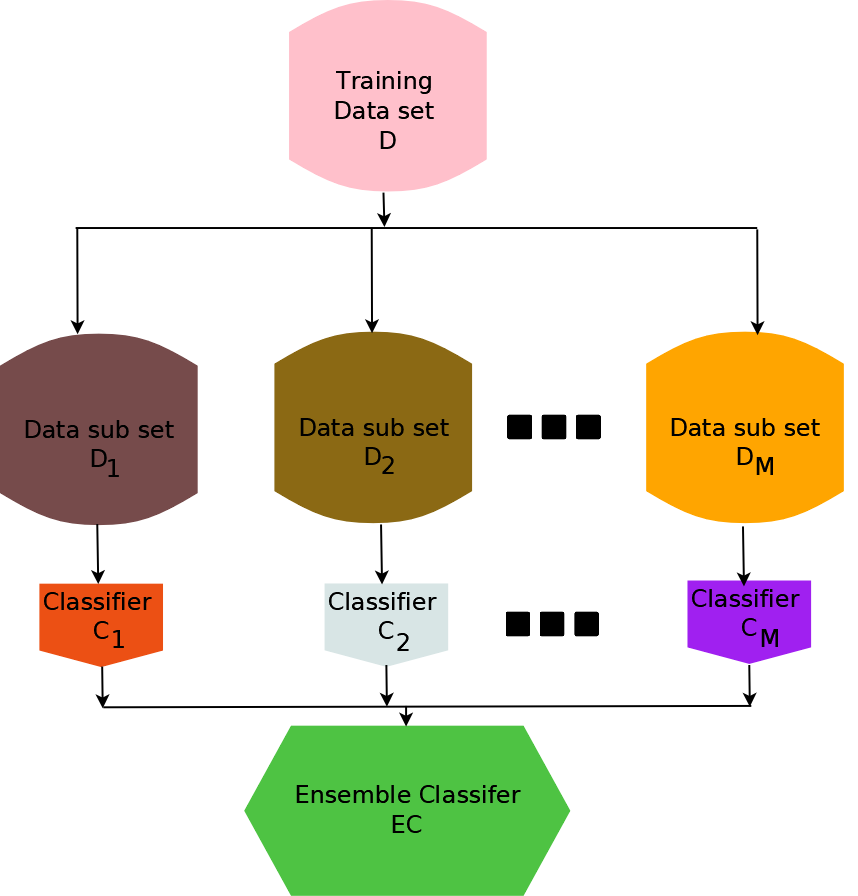

In [3]:
from urllib.request import urlopen
from PIL import Image

img = Image.open(urlopen('https://github.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/raw/main/images/ensemble_classifier.png'))
img

In [4]:
np.random.seed(1000)
#Create an index array 
indexarr = np.arange(num_samples) #index array
np.random.shuffle(indexarr) #shuffle the indices 
#print('shuffled indices of samples:')
#print(indexarr)

In [5]:
#Use the samples corresponding to first 80% of indexarr for training 
num_train = int(0.8*num_samples)
#Use the remaining 20% samples for testing 
num_test = num_samples-num_train
print('num_train: ',num_train, 'num_test: ', num_test)

num_train:  480 num_test:  120


In [6]:
#Use the first 80% of indexarr to create the train data features and train labels 
train_X = X[indexarr[0:num_train]]
train_y = y[indexarr[0:num_train]]
print('shape of train data features:')
print(train_X.shape)
print('shape of train data labels')
print(train_y.shape)

shape of train data features:
(480, 2)
shape of train data labels
(480,)


In [7]:
#Use remaining 20% of indexarr to create the test data and test labels  
test_X = X[indexarr[num_train:num_samples]]
test_y = y[indexarr[num_train:num_samples]]
print('shape of test data features:')
print(test_X.shape)
print('shape of test data labels')
print(test_y.shape)

shape of test data features:
(120, 2)
shape of test data labels
(120,)


classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
test accuracy from classifier: Nearest Neighbors  is: 0.825


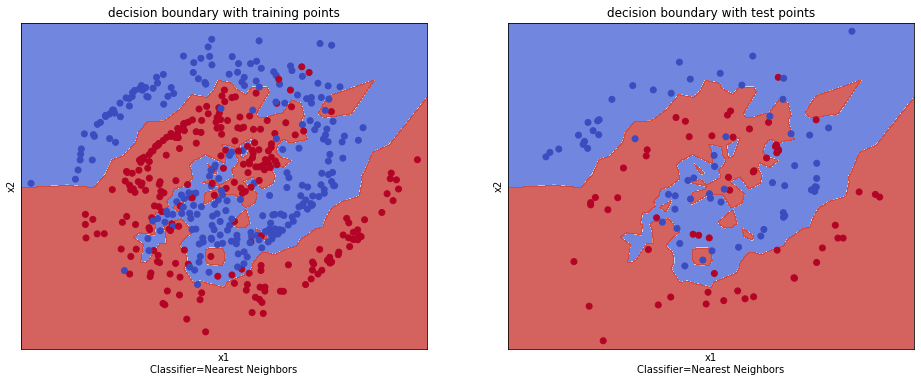

classifier: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
test accuracy from classifier: Kernel SVM  is: 0.775


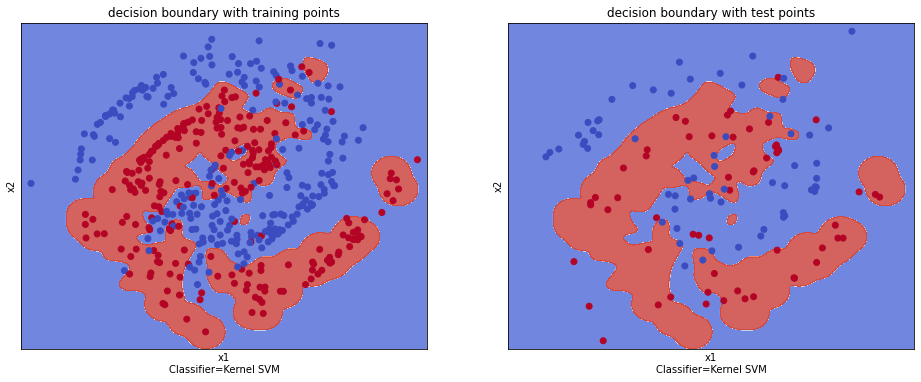

classifier: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
test accuracy from classifier: Decision Tree  is: 0.7916666666666666


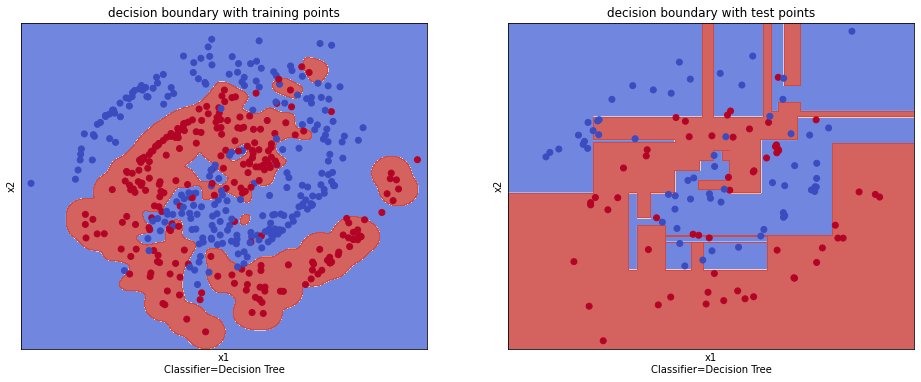

In [8]:
#Let us now use three different base classifiers and check the decision boundary 
from sklearn.svm import LinearSVC #import linear SVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree #decision tree from scikit learn 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# creating an object of LogisticRegression class

clf_list = [] 

#clf_linearsvc = LinearSVC(C=1.0)
clf_neigh = KNeighborsClassifier(n_neighbors=1, metric='euclidean') #weights='uniform' (default) or 'distance'
clf_svc = SVC(kernel='rbf', gamma=1)
clf_tree = tree.DecisionTreeClassifier(criterion='entropy')
#clf_logit = LogisticRegression(C=1.0) # C is set to be large number in order to remove the inbuilt regularization 

#clf_list.append(clf_linearsvc)
clf_list.append(clf_neigh)
clf_list.append(clf_svc)
clf_list.append(clf_tree)
#clf_list.append(clf_logit)

clf_names = ['Nearest Neighbors', 'Kernel SVM', 'Decision Tree']
num_classifiers = 3


# create a mesh to plot in
h=0.05 #mesh step size
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                    np.arange(x2_min, x2_max, h))


for i in range(num_classifiers):
  print('classifier:',clf_list[i])
  indexarr = np.arange(train_X.shape[0]) #index array for train data
  np.random.shuffle(indexarr) #shuffle the indices 
  #we shall choose 60% of the data
  partition_prop = 0.6
  num_samples_partition = int(partition_prop*train_X.shape[0])

  X_partition = train_X[indexarr[0:num_samples_partition]]
  y_partition = train_y[indexarr[0:num_samples_partition]]

  base_clf = clf_list[i] 
  base_clf_model = base_clf.fit(X_partition,y_partition.ravel())


  #test accuracy
  from sklearn.metrics import accuracy_score
  test_y_predicted = base_clf_model.predict(test_X)
  test_acc = accuracy_score(test_y, test_y_predicted)
  print('test accuracy from classifier:',clf_names[i],' is:', test_acc)

  if i == 0:
    Z_all_clf = base_clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    # Put the result into a color plot
    Z = Z_all_clf.reshape(xx1.shape)

    test_pred_all_clf = test_y_predicted

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    ax1.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=plt.cm.coolwarm)
    # plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
    # plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
    xlabel = 'x1' + str('\n')+'Classifier='+str(clf_names[i])
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('x2')
    ax1.set_xlim(xx1.min(), xx1.max())
    ax1.set_ylim(xx2.min(), xx2.max())
    ax1.set_xticks(())
    ax1.set_yticks(())
    ax1.set_title('decision boundary with training points')

    #plot the test points along with decision boundaries
    ax2.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the test points
    ax2.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=plt.cm.coolwarm)
    # plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
    # plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
    xlabel = 'x1' + str('\n')+'Classifier='+str(clf_names[i])
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('x2')
    ax2.set_xlim(xx1.min(), xx1.max())
    ax2.set_ylim(xx2.min(), xx2.max())
    ax2.set_xticks(())
    ax2.set_yticks(())
    ax2.set_title('decision boundary with test points')


    plt.show()



  elif i ==1:
    Z_base_clf = base_clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z_all_clf = np.column_stack( (Z_all_clf,Z_base_clf) )
    # Put the result into a color plot
    Z = Z_base_clf.reshape(xx1.shape)

    test_pred_all_clf = np.column_stack( (test_pred_all_clf,test_y_predicted) )

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    ax1.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=plt.cm.coolwarm)
    # plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
    # plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
    xlabel = 'x1' + str('\n')+'Classifier='+str(clf_names[i])
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('x2')
    ax1.set_xlim(xx1.min(), xx1.max())
    ax1.set_ylim(xx2.min(), xx2.max())
    ax1.set_xticks(())
    ax1.set_yticks(())
    ax1.set_title('decision boundary with training points')

    #plot the test points along with decision boundaries
    ax2.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the test points
    ax2.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=plt.cm.coolwarm)
    # plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
    # plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
    xlabel = 'x1' + str('\n')+'Classifier='+str(clf_names[i])
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('x2')
    ax2.set_xlim(xx1.min(), xx1.max())
    ax2.set_ylim(xx2.min(), xx2.max())
    ax2.set_xticks(())
    ax2.set_yticks(())
    ax2.set_title('decision boundary with test points')


    plt.show()


  elif i==2:
    Z_base_clf = base_clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z_all_clf = np.column_stack( (Z_all_clf,Z_base_clf) )
    test_pred_all_clf = np.column_stack( (test_pred_all_clf,test_y_predicted) )
    
    Z = Z_base_clf.reshape(xx1.shape)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    ax1.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Put the result into a color plot
    
    # Plot also the training points
    ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=plt.cm.coolwarm)
    # plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
    # plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
    xlabel = 'x1' + str('\n')+'Classifier='+str(clf_names[i])
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('x2')
    ax1.set_xlim(xx1.min(), xx1.max())
    ax1.set_ylim(xx2.min(), xx2.max())
    ax1.set_xticks(())
    ax1.set_yticks(())
    ax1.set_title('decision boundary with training points')

    #plot the test points along with decision boundaries
    ax2.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the test points
    ax2.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=plt.cm.coolwarm)
    # plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
    # plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
    xlabel = 'x1' + str('\n')+'Classifier='+str(clf_names[i])
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('x2')
    ax2.set_xlim(xx1.min(), xx1.max())
    ax2.set_ylim(xx2.min(), xx2.max())
    ax2.set_xticks(())
    ax2.set_yticks(())
    ax2.set_title('decision boundary with test points')


    plt.show()





In [9]:
Z_all_clf = np.array(Z_all_clf)
print(Z_all_clf.shape)

test_pred_all_clf = np.array(test_pred_all_clf)
print(test_pred_all_clf.shape)

(639271, 3)
(120, 3)


In [10]:

from scipy import stats

Z_all_clf = Z_all_clf.astype(int)

test_pred_all_clf = test_pred_all_clf.astype(int)


Z, counts = stats.mode(Z_all_clf, axis=1)

test_pred, counts = stats.mode(test_pred_all_clf, axis=1)
test_acc = accuracy_score(test_y, test_pred)
print('test accuracy from ensemble classifier is:', test_acc)


# for i in range(Z_all_clf.shape[0]):
#   #print(Z_all_clf[i])
#   if (i+1)%100000 == 0:
#     print('*')
#   unique, counts = np.unique(Z_all_clf[i].astype(int), return_counts=True)
#   Z[i] = unique[np.argmax(counts)]


test accuracy from ensemble classifier is: 0.85


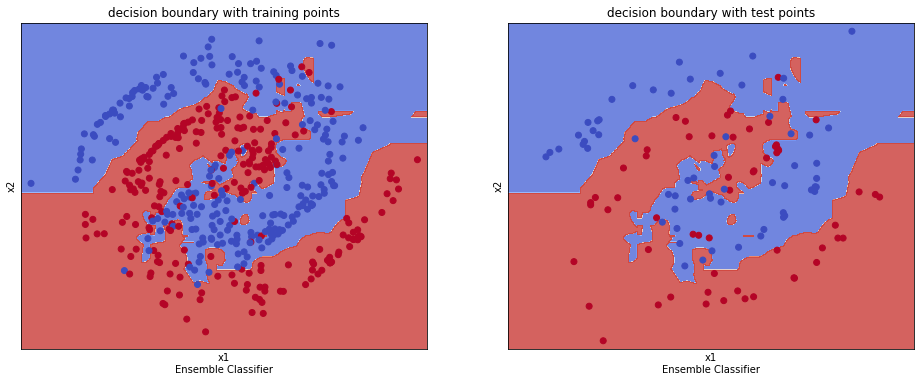

In [12]:
# Put the result into a color plot
Z = Z.reshape(xx1.shape)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
ax1.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Put the result into a color plot

# Plot also the training points
ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=plt.cm.coolwarm)
# plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
# plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
xlabel = 'x1' + str('\n')+'Ensemble Classifier'
ax1.set_xlabel(xlabel)
ax1.set_ylabel('x2')
ax1.set_xlim(xx1.min(), xx1.max())
ax1.set_ylim(xx2.min(), xx2.max())
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('decision boundary with training points')

#plot the test points along with decision boundaries
ax2.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the test points
ax2.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=plt.cm.coolwarm)
# plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
# plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
xlabel = 'x1' + str('\n')+'Ensemble Classifier'
ax2.set_xlabel(xlabel)
ax2.set_ylabel('x2')
ax2.set_xlim(xx1.min(), xx1.max())
ax2.set_ylim(xx2.min(), xx2.max())
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('decision boundary with test points')


plt.show()

$\large{\text{Ways of building an ensemble classifier}}$

$\textbf{Create multiple attribute partitions from training data}$

1.   Resample the attributes from original training data $D$ (using sampling with replacement) and create different feature paritions $F_1, F_2, \ldots, F_M$. Note that the number of samples in these partitions might be same as that in $D$ or might be different.
2.   Train different classifiers $C_i$ on respective feature partition $F_i$, $i \in \{1,2,\ldots,M\}$.
3.   For a test data point $\hat{x}$ first create feature partitions based on $F_1, F_2, \ldots, F_M$ and predict the label $\hat{y}=\text{MajorityVote}(C_1(F_1(\hat{x})),C_2(F_2(\hat{x})), \ldots, C_M(F_M(\hat{x})))$.  


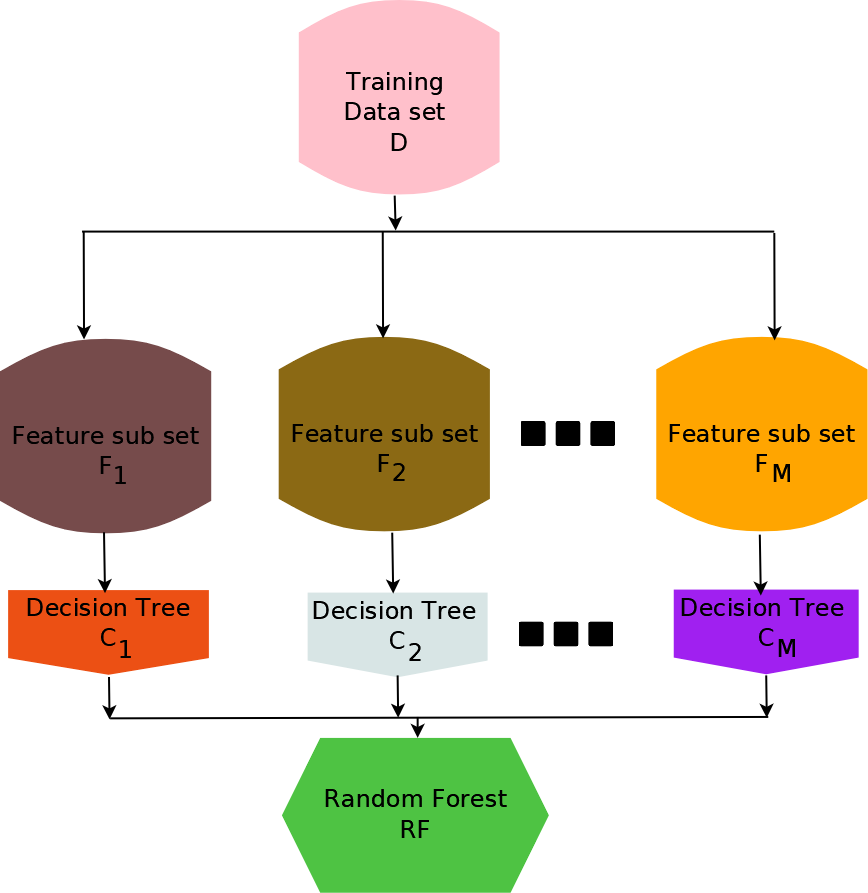

In [13]:
from urllib.request import urlopen
from PIL import Image

img = Image.open(urlopen('https://github.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/raw/main/images/ensemble_classifier_RF.png'))
img

In [30]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators = 100,  random_state=0)
clf_model = clf_rf.fit(train_X, train_y)

test_y_predicted = clf_model.predict(test_X)
test_acc = accuracy_score(test_y, test_y_predicted)
print('test accuracy from RF classifier: is:', test_acc)


test accuracy from RF classifier: is: 0.85


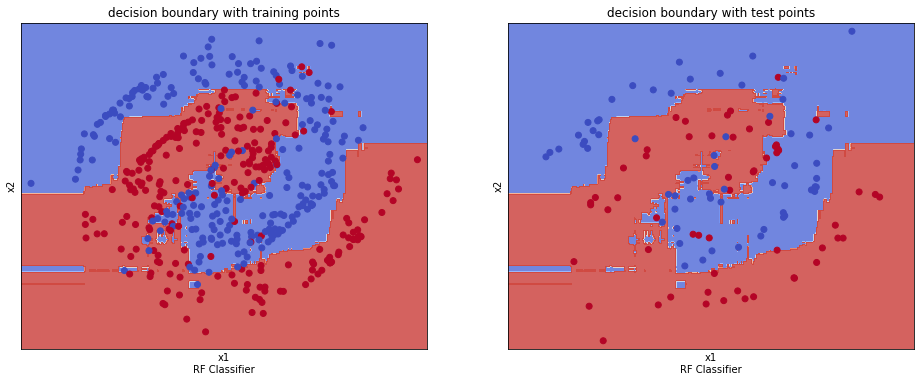

In [29]:
Z = clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
ax1.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Put the result into a color plot

# Plot also the training points
ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=plt.cm.coolwarm)
# plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
# plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
xlabel = 'x1' + str('\n')+'RF Classifier'
ax1.set_xlabel(xlabel)
ax1.set_ylabel('x2')
ax1.set_xlim(xx1.min(), xx1.max())
ax1.set_ylim(xx2.min(), xx2.max())
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('decision boundary with training points')

#plot the test points along with decision boundaries
ax2.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the test points
ax2.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=plt.cm.coolwarm)
# plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
# plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
xlabel = 'x1' + str('\n')+'RF Classifier'
ax2.set_xlabel(xlabel)
ax2.set_ylabel('x2')
ax2.set_xlim(xx1.min(), xx1.max())
ax2.set_ylim(xx2.min(), xx2.max())
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('decision boundary with test points')


plt.show()

$\large{\text{Exercise}}$


1.   For the two spirals dataset considered above, try the ensemble of the following classifiers



*   Nearest Neighbor with $3$ nearest neighbors and Manhattan metric
*   Nearest Neighbor with $5$ nearest neighbors and Chebyshev metric
*   Nearest Neighbor with $7$ nearest neighbors weighted by the Euclidean distance  
*   Nearest Neighbor with $11$ nearest neighbors weighted by the Chebyshev metric
*   Kernel SVM with polynomial kernel with a suitable $p$
*   Kernel SVM with sigmoid kernel with a suitable $\gamma$ 
*   Decision tree with gini metric

        
Analyze the training set and test set performance obtained by each classifier and by the ensemble classifier.            
          

2.   Write suitable code to obtain the type of features used in each tree in the random forest. Write suitable code to get the individual predictions from the trees in the random forest. 

